In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statistics
import pandas as pd
from pathlib import Path
import os
import numpy as np

import pylab as pl

name = "pll"
Datasetpath = Path(os.path.abspath('')) / f"{name}s_1000k.csv"
algopath = Path(os.path.abspath('')).parents[0] / f"Cube/new_{name}_algos.csv"
print(Datasetpath)
print(algopath)

C:\Users\bliks\Documents\School\Maturaarbeit\NNRubiksCube\Datasets\plls_1000k.csv
C:\Users\bliks\Documents\School\Maturaarbeit\NNRubiksCube\Cube\new_pll_algos.csv


In [42]:
# read data
algos = pd.read_csv(algopath, usecols=("Cube State",), dtype=str).iloc[:, 0].values.tolist()
data = pd.read_csv(filepath_or_buffer=Datasetpath, usecols=("Type",), dtype=str).iloc[:, 0].values.tolist()
# print(algos)
# print(data)
bins = []
dupes = []
for x in algos:
    if x in set(bins):
        dupes.append(x)
    else:
        bins.append(x)
# print(bins)

In [43]:
amount = []
for x in bins:
    number = data.count(x)
    amount.append(number)
zipped = list(zip(bins, amount))
mean = statistics.mean(amount)
# print(dupes)
print(sum(amount))
print(len(bins))
print(len(zipped))

1000000
288
288


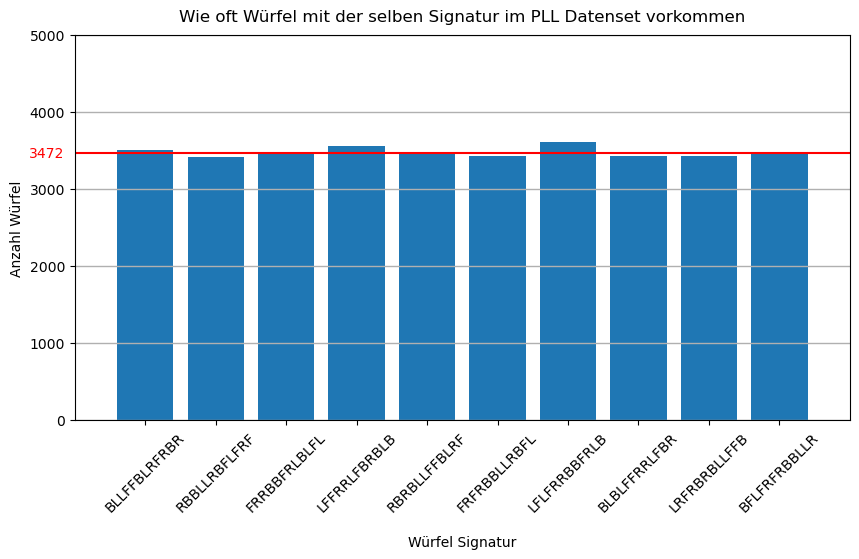

In [44]:
# histogram
plt.figure(figsize=(10, 5))
plt.subplot()
plt.title(f"Wie oft Würfel mit der selben Signatur im {name.upper()} Datenset vorkommen", pad=10)
plt.ylabel("Anzahl Würfel")
plt.xlabel("Würfel Signatur", labelpad=15)
plt.grid(True, 'major', 'y', linewidth=1)
plt.xticks(rotation=45)
plt.xlim(-1, len(bins[:10]))
plt.ylim(0, 5000)
plt.axhline(mean, color='r', label="average")
plt.text(-1.14, mean, f"{mean:.0f}", color='r', ha='right', va='center')
plt.bar(bins[:10], amount[:10], align='center')
# plt.show()
plt.savefig(f"histogram_{name}s_1000k.svg", bbox_inches="tight")

In [45]:
stdev = statistics.stdev(amount)
perc = stdev / mean * 100
print(f"{stdev=:.2f}")
print(f"{perc=:.2f}%")
print(f"{mean=}")

stdev=56.64
perc=1.63%
mean=3472.222222222222
